# Klaver and Coath 2019

[Klaver and Coath 2019, Geostand. Geoanal. Res.](https://doi.org/10.1111/ggr.12248) provide an excellent practical introduction to the double spike technique. This notebook reproduces some of their figures using the python version of the double spike toolbox.

In [1]:
import doublespike as ds
import numpy as np
import matplotlib.pyplot as plt

We have a Ni double spike with $^{58}$Ni, $^{60}$Ni, $^{61}$Ni,$^{62}$Ni as inversion isotopes.

In [2]:
isodata_ni = ds.IsoData("Ni")
isodata_ni.set_isoinv([58, 60, 61, 62])

## Figure 3
This figure illustrates the regions of best precision for $^{60}$Ni-$^{62}$Ni and $^{61}$Ni-$^{62}$Ni double spikes.

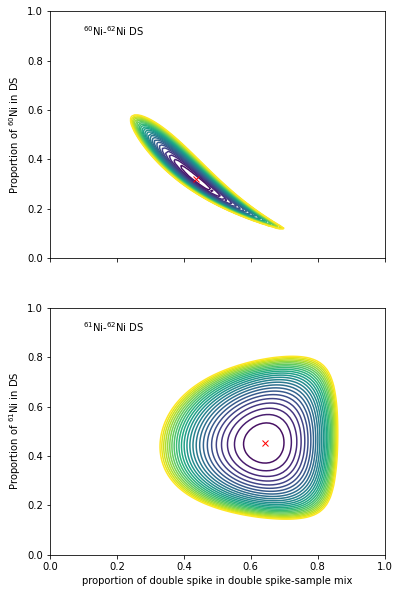

In [3]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(6, 10))
isodata_ni.set_errormodel()  # use default error model
ds.errorcurve2d(isodata_ni, "real", isospike=[60, 62], ax=axs[0])
ds.errorcurve2d(isodata_ni, "real", isospike=[61, 62], ax=axs[1])
axs[0].set_title("")
axs[0].set_xlabel("")
axs[0].set_ylabel("Proportion of $^{60}$Ni in DS")
axs[0].text(0.1, 0.9, "$^{60}$Ni-$^{62}$Ni DS")
axs[1].set_title("")
axs[1].set_ylabel("Proportion of $^{61}$Ni in DS")
axs[1].text(0.1, 0.9, "$^{61}$Ni-$^{62}$Ni DS");

## Figure 4
This figure shows the variation in precision with beam intensity and spike-sample ratio. The errors on the $y$-axis have been scaled by the square root of intensity.

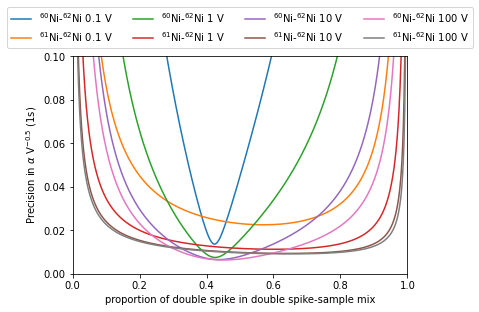

In [4]:
# Find the composition of the optimal spikes
opt60_62_spike = ds.optimalspike(isodata_ni, "real", isospike=[60, 62])["optspike"][0, :]
opt61_62_spike = ds.optimalspike(isodata_ni, "real", isospike=[61, 62])["optspike"][0, :]


def scaled_error_plot(intensity):
    isodata_ni.set_errormodel(intensity=intensity)
    ds.errorcurve(
        isodata_ni,
        spike=opt60_62_spike,
        scale=np.sqrt(intensity),
        label="$^{60}$Ni-$^{62}$Ni " + str(intensity) + " V",
    )
    ds.errorcurve(
        isodata_ni,
        spike=opt61_62_spike,
        scale=np.sqrt(intensity),
        label="$^{61}$Ni-$^{62}$Ni " + str(intensity) + " V",
    )


[scaled_error_plot(I) for I in [0.1, 1, 10, 100]]
plt.title("")
plt.ylabel(r"Precision in $\alpha$ V$^{-0.5}$ (1s)")
plt.ylim([0, 0.1])
plt.legend(loc="upper center", ncol=4, bbox_to_anchor=(0.5, 1.25));

## Figure 8
This figure explores the effect on precision on fixing the voltage coming from the sample.

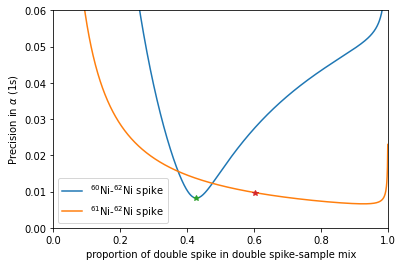

In [5]:
# Work out the optimal spike for a fixed total of 1 V
isodata_ni.set_errormodel(intensity=1.0, measured_type="fixed-total")
os_60_62 = ds.optimalspike(isodata_ni, "real", isospike=[60, 62])
os_61_62 = ds.optimalspike(isodata_ni, "real", isospike=[61, 62])

# Now plot error cruves for a fixed 0.5 V coming from the sample
isodata_ni.set_errormodel(intensity=0.5, measured_type="fixed-sample")
ds.errorcurve(isodata_ni, opt60_62_spike, label="$^{60}$Ni-$^{62}$Ni spike")
ds.errorcurve(isodata_ni, opt61_62_spike, label="$^{61}$Ni-$^{62}$Ni spike")
plt.title("")
plt.ylim([0, 0.06])
plt.ylabel(r"Precision in $\alpha$ (1s)")
plt.legend()

# Add stars to the plot to indicate the 1 V optimal proportions
spike_60_62 = os_60_62["optspike"][0]
prop_60_62 = os_60_62["optprop"][0]
err60_62, _ = ds.errorestimate(isodata_ni, prop_60_62, spike_60_62)
plt.plot(prop_60_62, err60_62, "*")

spike_61_62 = os_61_62["optspike"][0]
prop_61_62 = os_61_62["optprop"][0]
err61_62, _ = ds.errorestimate(isodata_ni, prop_61_62, spike_61_62)
plt.plot(prop_61_62, err61_62, "*");